In [22]:
#Data Preperation

## Reading Data ##
import pandas as pd
import numpy as np
df = pd.read_csv("Final_Adjusted_Telco_Customer_Churn.csv",delimiter = ",")
display(df)

print("Dimensions of the DataFrame is "+str(df.shape))
## Showing  types of the data presented by .info() method
display(df.info())


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No#,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No@,NaN,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male%,0.0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0.0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0.0,Yes,Yes!,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1.0,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Dimensions of the DataFrame is (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7024 non-null   object 
 1   gender            7018 non-null   object 
 2   SeniorCitizen     6965 non-null   float64
 3   Partner           7015 non-null   object 
 4   Dependents        7013 non-null   object 
 5   tenure            6960 non-null   float64
 6   PhoneService      7018 non-null   object 
 7   MultipleLines     7022 non-null   object 
 8   InternetService   7015 non-null   object 
 9   OnlineSecurity    7009 non-null   object 
 10  OnlineBackup      7015 non-null   object 
 11  DeviceProtection  7021 non-null   object 
 12  TechSupport       7020 non-null   object 
 13  StreamingTV       7018 non-null   object 
 14  StreamingMovies   7017 non-null   object 
 15  Contract          7019 non-null   object 
 16  

None

In [23]:
# Print the varibels of the data
print(list(df.select_dtypes(include='object').columns))
print(list(df.select_dtypes(exclude='object').columns))

##    Basic observations   ##
# We can split the fields into Two main data tyeps

# 1 - Categorical 
# Which are customerID , gender , Partner , Dependents , PhoneService , MultipleLines , InternetService , OnlineSecurity
# OnlineBackup , DeviceProtection TechSupport , StreamingTV , StreamingMovies , Contract , PaperlessBilling , PaymentMethod  , Churn  

# 2 - Numerical
# Which are  tenure , MonthlyCharges , SeniorCitizen

# Since we do not need SeniorCitizen in mathematical calculations we will convert it into Categorical data
# Also we may need TotalCharges in mathematical calculations we will convert it into Numerical data

print("Current Data Types:")
display(pd.DataFrame(df.dtypes).T)

# Display the first few rows of the DataFrame
df.head()





['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges']
Current Data Types:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,object,object,float64,object,object,float64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No#,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No@,NaN,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [24]:
#Checking if there is NaN values
null_columns=df.columns[df.isna().any()]
print(f'The number of rows are {len(df.index)}, and the number of columns are {len(df.columns)}')
print(f'The number of non-null rows for each column are:')
display(pd.DataFrame(df.count()))
print('Columns with NaN values are:') 
display(pd.DataFrame(null_columns))
# Now we conclude that there is no null-values on the DataFrame

The number of rows are 7043, and the number of columns are 21
The number of non-null rows for each column are:


,0
customerID,7024
gender,7018
SeniorCitizen,6965
Partner,7015
Dependents,7013
tenure,6960
PhoneService,7018
MultipleLines,7022
InternetService,7015
OnlineSecurity,7009


Columns with NaN values are:


,0
0,customerID
1,gender
2,SeniorCitizen
3,Partner
4,Dependents
5,tenure
6,PhoneService
7,MultipleLines
8,InternetService
9,OnlineSecurity


In [25]:
import re

# Set a threshold for minimum non-null values required in a column to be retained
threshold = 0.3 * len(df)

print("Dimensions of the DataFrame bfore droping columns is "+str(df.shape))

# Drop columns from the DataFrame that have less than the threshold non-null values
df = df.dropna(thresh=threshold, axis=1)

# Identify columns that still have any missing values
null_columns = df.columns[df.isna().any()]

for c in null_columns:
    # If the column is numerical, calculate the mean of the column
    if df[c].dtype != 'object':
        value = df[c].mean()
    # If the column is categorical, determine the mode (most frequent value)
    else:
        value = df[c].mode()[0]
    # Fill NaN values in the column with the calculated mean or mode
    df[c].fillna(value, inplace=True)

# ensure that numerical are in correct format
df[['tenure','MonthlyCharges']]=df[['tenure','MonthlyCharges',]].applymap(lambda x: abs(x) if x<0 else x)

char = '!@#$%^&*_-+'
pattern = '[' + re.escape(char) + ']'  # Create a regex pattern for the special characters

for column in df.select_dtypes(include='object').columns:
    # Check if the column contains any of the special characters
    if df[column].str.contains(pattern).any():
        # Remove special characters from the column
        df[column] = df[column].str.replace(pattern, '', regex=True)
    

print("Current Data Types:")
display(pd.DataFrame(df.dtypes).T)

# Change the 'SeniorCitizen' column to type 'object'
df['SeniorCitizen'] = df['SeniorCitizen'].apply(lambda x: str(int(float(x))))
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

# Change the 'TotalCharges' column to type 'float64'
# Ensure that the 'TotalCharges' column is converted properly to float
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x.strip()) if x.strip() and x.replace('.', '', 1).isdigit() else 0.0)
df['TotalCharges'] = df['TotalCharges'].astype('float64')

print("\nUpdated Data Types:")
display(pd.DataFrame(df.dtypes).T)

print("Dimensions of the DataFrame after droping columns is "+str(df.shape))

# we conclude that the data did not excede the threshold for minimum non-null values

df.sample(10)

Dimensions of the DataFrame bfore droping columns is (7043, 21)
Current Data Types:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,object,object,float64,object,object,float64,object,object,object,object,...,object,object,object,object,object,object,object,float64,object,object



Updated Data Types:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,object,object,object,object,object,float64,object,object,object,object,...,object,object,object,object,object,object,object,float64,float64,object


Dimensions of the DataFrame after droping columns is (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4078,0628CNQRM,Male,0,Yes,Yes,22.0,Yes,No,DSL,Yes,...,Yes,Yes,Yes,No,One year,Yes,Bank transfer (automatic),67.50,1544.05,Yes
2415,9898KZQDZ,Female,1,Yes,Yes,40.0,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Monthtomonth,Yes,Credit card (automatic),94.55,3640.45,Yes
496,4134BSXLX,Male,0,Yes,No,28.0,Yes,No,DSL,Yes,...,No,Yes,No,No,Monthtomonth,No,Mailed check,60.90,1785.65,No
3497,9799CAYJJ,Female,1,Yes,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,69.30,153.80,No
6216,7162WPHPM,Male,0,Yes,Yes,58.0,Yes,Yes,DSL,Yes,...,Yes,Yes,No,No,Two year,No,Credit card (automatic),71.60,4230.25,No
712,9661JALZV,Female,0,No,No,58.0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.70,1519.00,No
4552,1385TQOZW,Female,0,No,No,9.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Monthtomonth,Yes,Credit card (automatic),20.45,147.55,No
5271,6507DTJZV,Male,0,No,Yes,13.0,Yes,No,DSL,No,...,No,No,Yes,Yes,Monthtomonth,No,Credit card (automatic),66.40,831.75,No
2376,9314QDMDW,Male,0,No,No,11.0,Yes,No,DSL,No,...,No,No,Yes,No,One year,Yes,Electronic check,61.25,729.95,No
6997,2523EWWZL,Female,0,Yes,No,27.0,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,76.10,2093.40,No


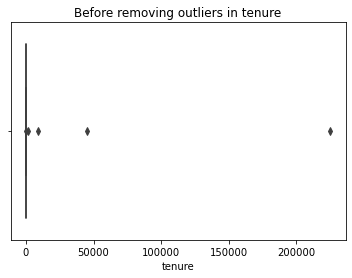

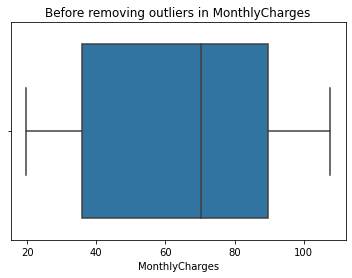

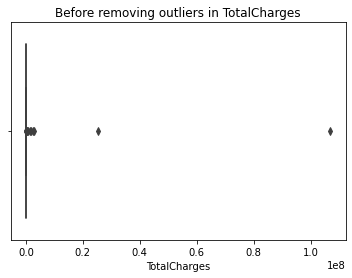

In [26]:
#Visualizing the output column to see if there is any outliers
import matplotlib.pyplot as plt
import seaborn as sns

numerical_columns = df.select_dtypes(exclude='object').columns
for col in numerical_columns:
    plt.figure()
    sns.boxplot(x=col,data=df)
    plt.title(f"Before removing outliers in {col}") 
    plt.show()

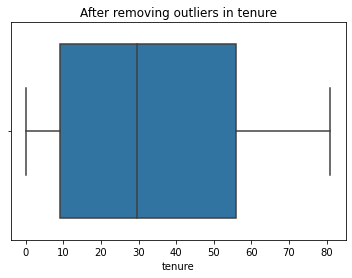

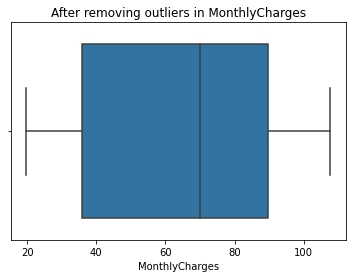

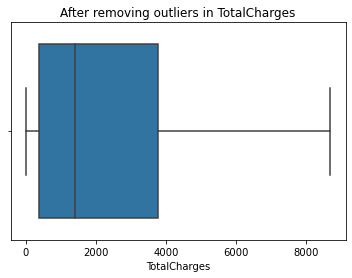

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,29.85,No
1,5575GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,108.15,Yes
3,7795CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,6840RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7022,2234XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7023,4801JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.60,346.45,No
7024,8361LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Mailed check,74.40,306.60,Yes


In [27]:
# Select numerical columns
num_columns = df.select_dtypes(exclude='object').columns

# Iterate over each numerical column to remove outliers
for col in num_columns:
    # Calculate Q1, Q3 and IQR
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    # Define minimum and maximum thresholds for outliers
    MIN = Q1 - 1.5 * IQR
    MAX = Q3 + 1.5 * IQR

    # Identify and remove outliers
    drop_mask = (df[col] < MIN) | (df[col] > MAX)
    df = df[~drop_mask]

# Reset the index of the DataFrame after removing outliers
df.reset_index(drop=True, inplace=True)

# Plotting boxplots for all numerical columns after removing outliers
for col in num_columns:
    plt.figure()
    sns.boxplot(x=col, data=df)
    plt.title(f"After removing outliers in {col}")
    plt.show()

# Display the DataFrame
display(df)

In [28]:
# 3 - Model Planning

## Statistical Summaries ##

# This includes measures like mean, standard deviation, min, max, and quartiles
display(df.describe(include='number'))

# This usually includes counts, unique values, top (most common) value, and frequency of top value
display(df.describe(include="object"))

# This is helpful to get a quick overview of the data after the statistical summaries
display(df)

,tenure,MonthlyCharges,TotalCharges
count,7026.000000,7026.000000,7026.000000
mean,32.886258,64.605346,2269.621684
std,24.813766,29.653416,2267.591456
min,0.000000,19.650000,0.000000
25%,9.000000,35.900000,383.800000
50%,29.500000,70.125000,1387.175000
75%,56.000000,89.800000,3777.787500
max,81.000000,107.682500,8684.800000


,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026,7026
unique,7007,2,20,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,0002ORFBO,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Monthtomonth,Yes,Electronic check,No
freq,20,3553,5829,3639,4933,6346,3395,3108,3509,3093,3097,3478,2816,2791,3878,4170,2380,5166


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590VHVEG,Female,0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.85,29.85,No
1,5575GNVDE,Male,0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668QPYBK,Male,0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Mailed check,53.85,108.15,Yes
3,7795CFOCW,Male,0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237HQITU,Female,0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,6840RESVB,Male,0,Yes,Yes,24.0,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7022,2234XADUH,Female,0,Yes,Yes,72.0,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7023,4801JZAZL,Female,0,Yes,Yes,11.0,No,No phone service,DSL,Yes,...,No,No,No,No,Monthtomonth,Yes,Electronic check,29.60,346.45,No
7024,8361LTMKD,Male,1,Yes,No,4.0,Yes,Yes,Fiber optic,No,...,No,No,No,No,Monthtomonth,Yes,Mailed check,74.40,306.60,Yes


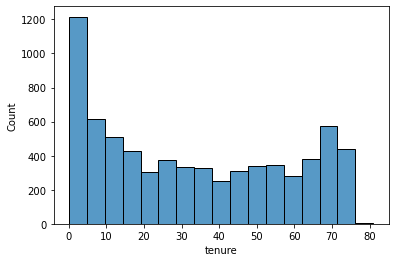

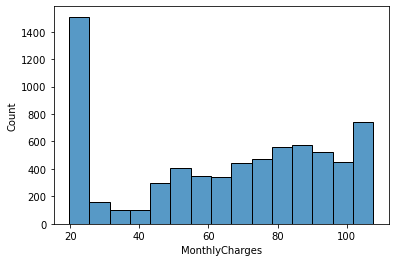

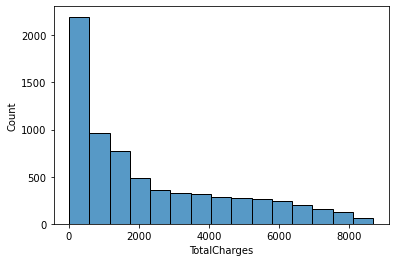

In [29]:
# for exploratory data analysis to visualize the distribution of values in each numerical column of the DataFrame .

plt.figure()  
# Create a histogram plot for the tenure column 
sns.histplot(x='tenure', data=df)
plt.show()  # Display the histogram plot

plt.figure()  
# Create a histogram plot for the Monthly Charges column 
sns.histplot(x='MonthlyCharges',bins=15 ,data=df)
plt.show()  # Display the histogram plot

plt.figure()  
# Create a histogram plot for the Total Charges column 
sns.histplot(x='TotalCharges',bins=15 ,data=df)
plt.show()  # Display the histogram plot

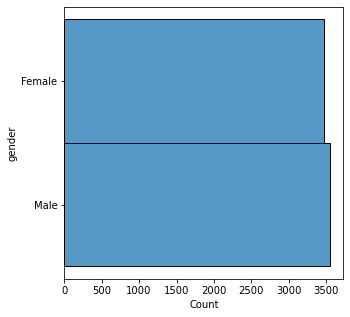

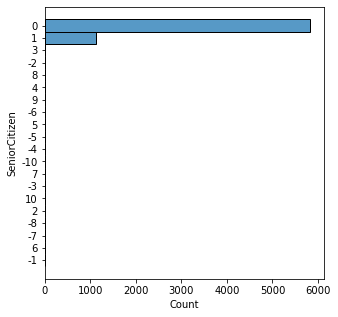

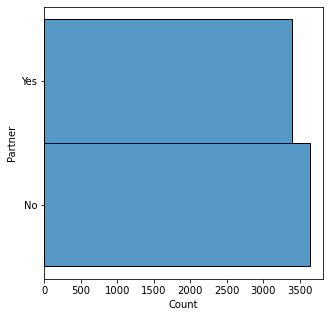

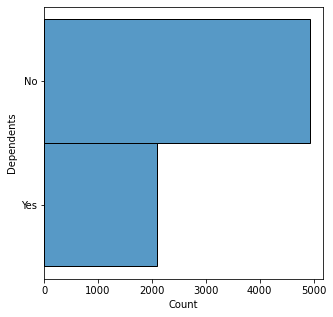

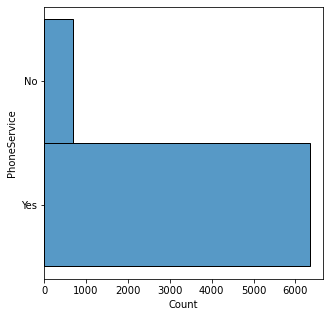

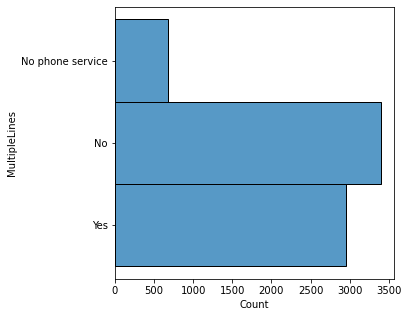

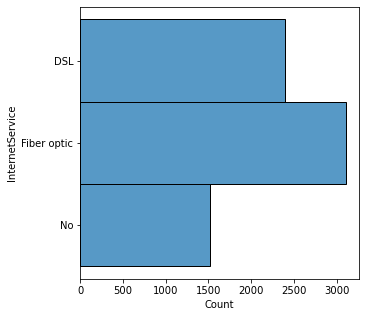

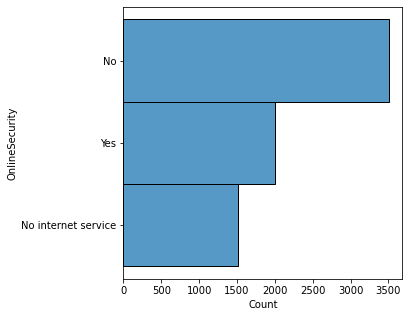

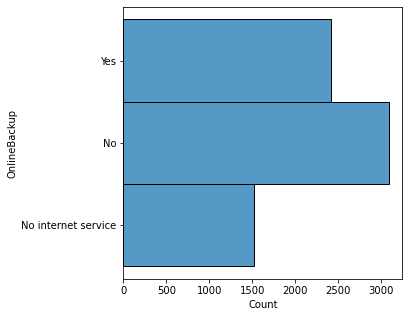

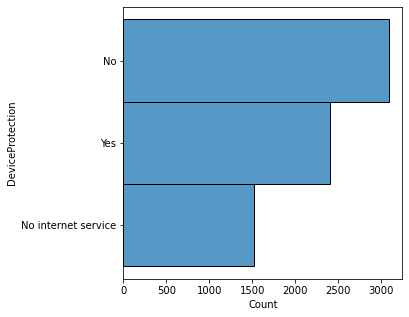

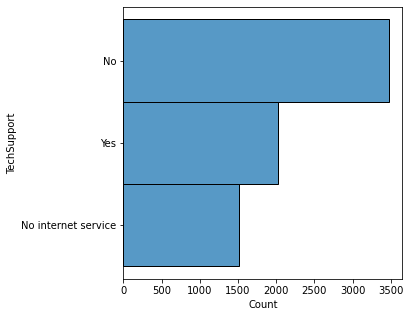

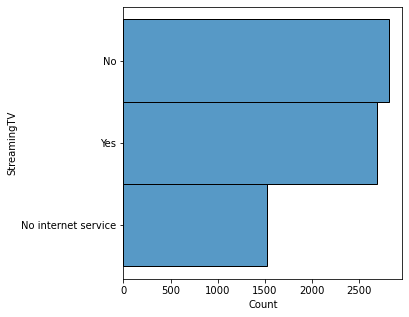

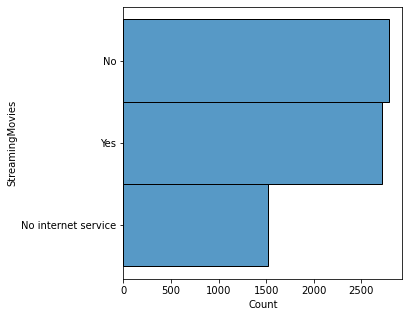

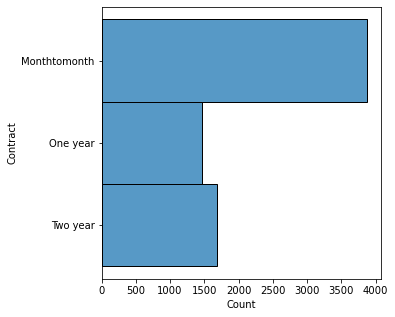

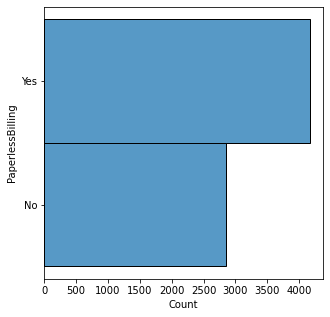

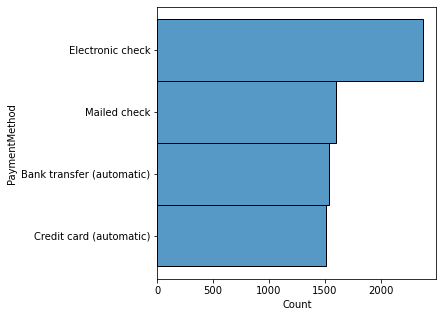

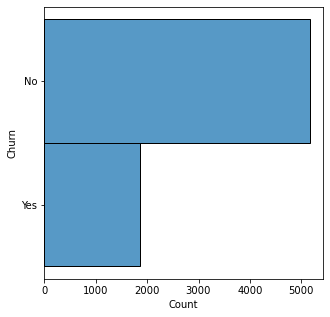

In [30]:
#                   Unvariate graphs for categorical columns               #
categorical_columns = df.select_dtypes(include='object').columns

cat_columns = categorical_columns[1:]
# Drop the first categorical id column no need for ploting

for col in cat_columns:
    plt.figure(figsize=(5,5))  
    # The data is plotted along the y-axis to better accommodate categorical labels
    sns.histplot(y=col, data=df)
    plt.show()

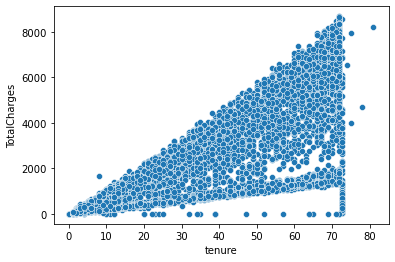

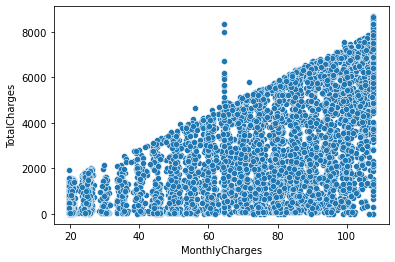

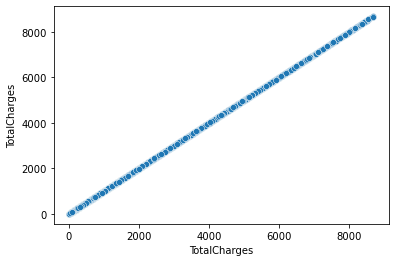

In [31]:
num_columns = df.select_dtypes(exclude='object').columns
# Making bivariate graphs using scatter plot #
for col in num_columns:
    plt.figure() 

    # Create a scatter plot with the current column on the x-axis and 'TotalCharges' on the y-axis
    # This plots the relationship between each input numerical column and the output (TotalCharges)
    sns.scatterplot(y='TotalCharges', x=col, data=df)

    plt.show()  # Display the scatter plot


# 1- Scatter plots are used to visualize the relationship between two variables, here each input numerical column and the Total Charges.
# 2- These plots can help identify patterns such as linear or non-linear relationships, clusters, and outliers.
# this is essential for understanding how different input variables might influence the output (TotalCharges).
# 3- It aids in identifying potential predictors for the price and in making decisions about feature selection for predictive modeling.


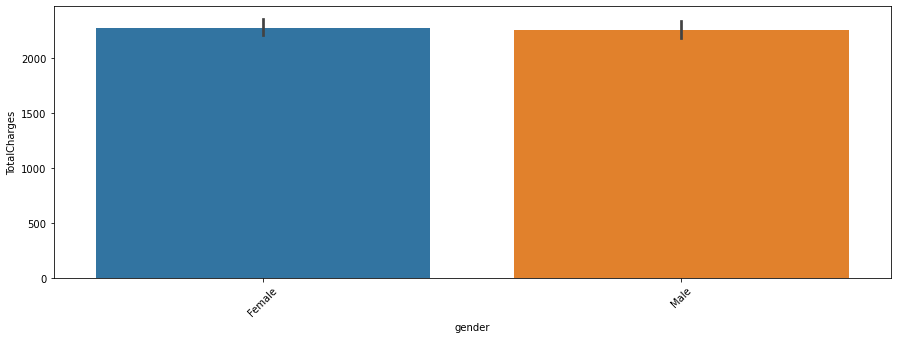

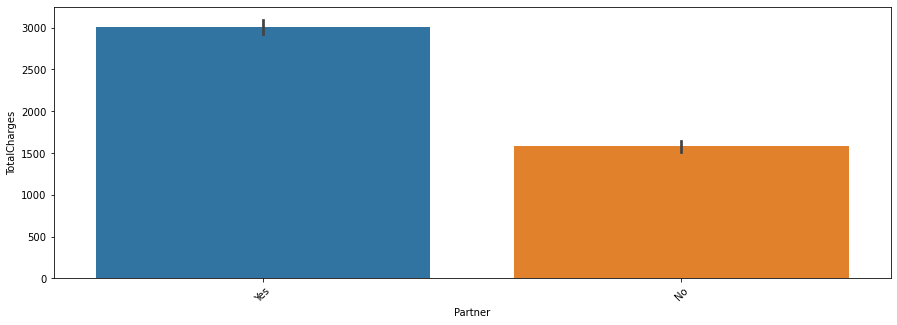

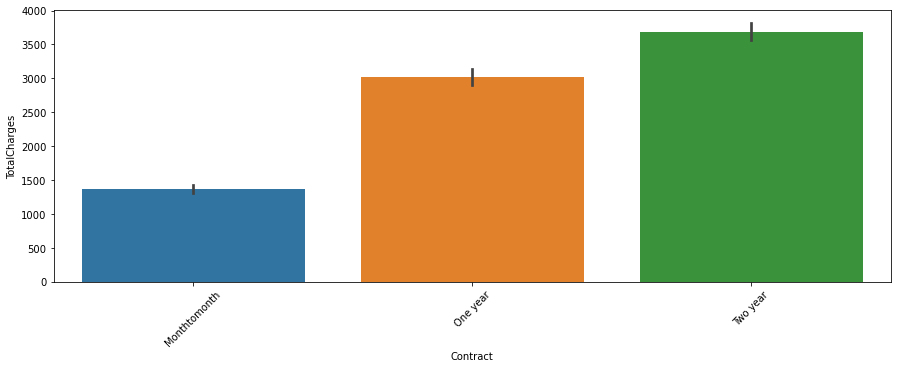

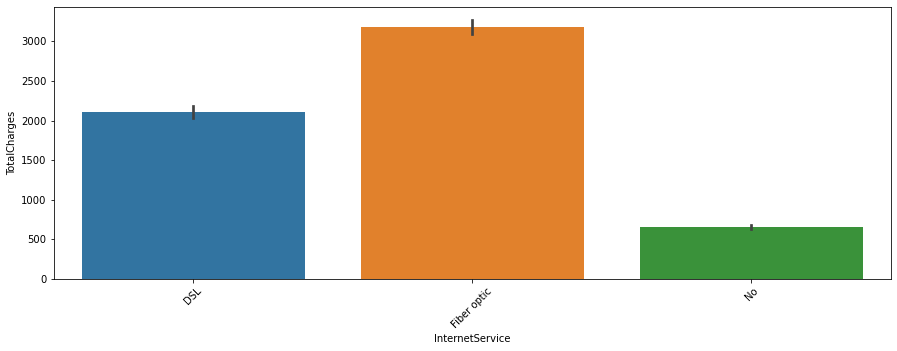

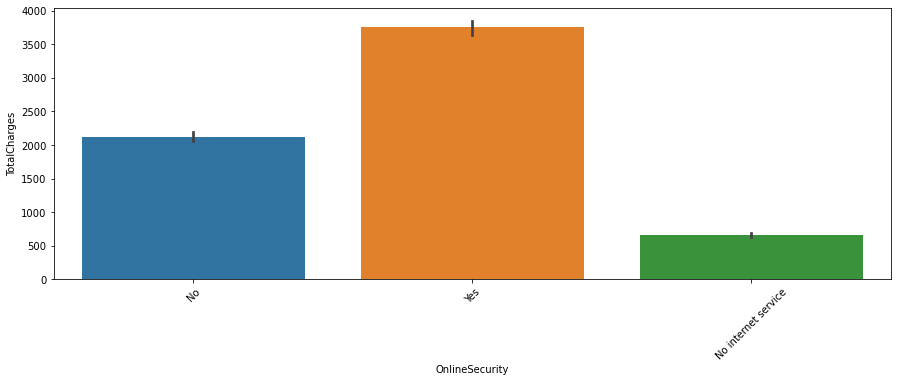

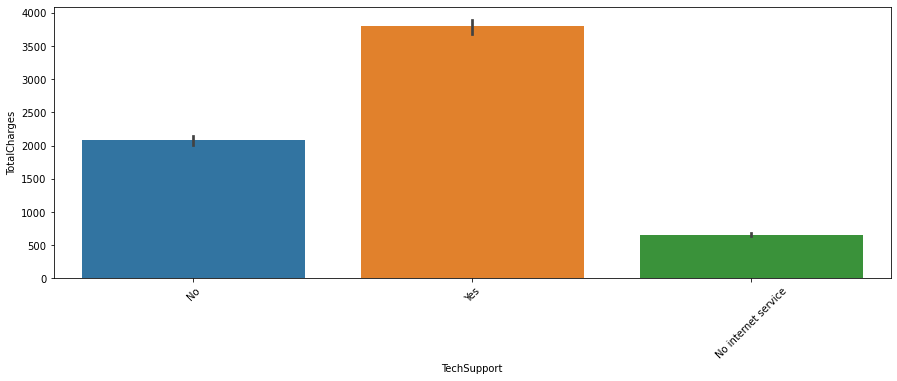

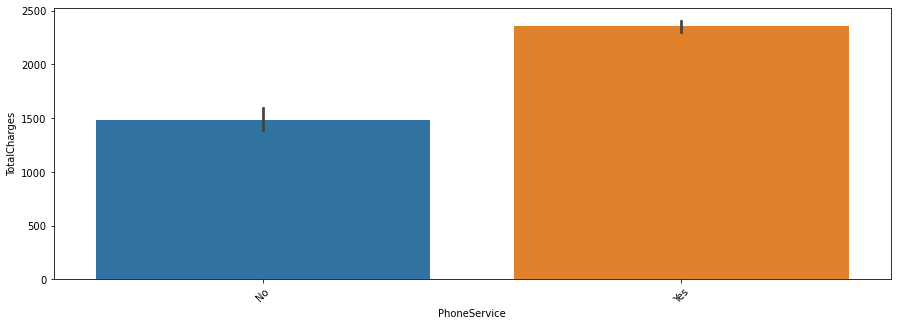

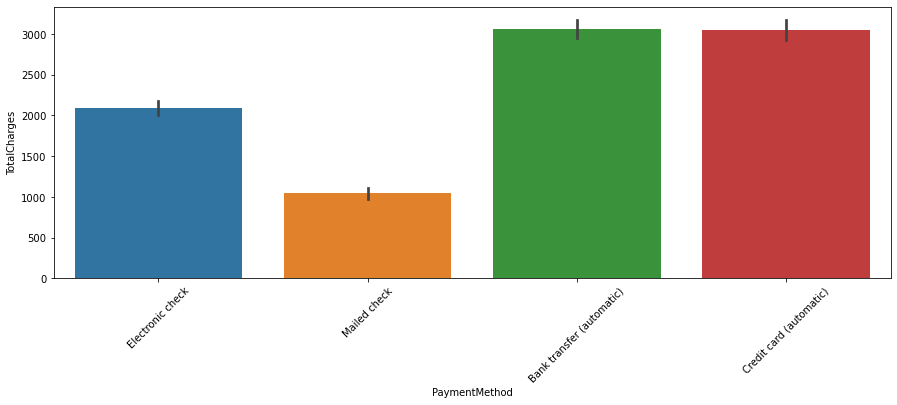

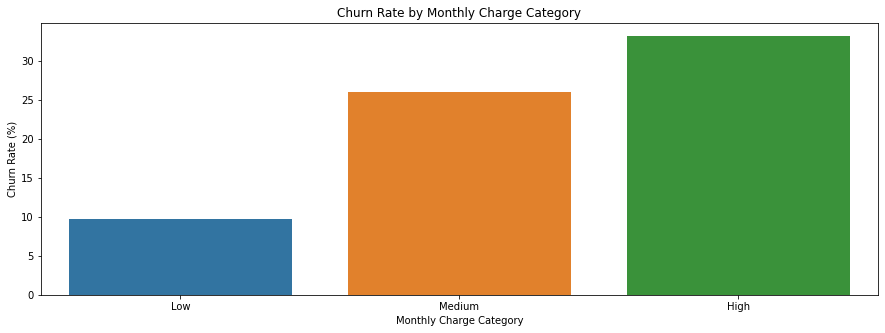

In [32]:
# More Graphs
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns



name_list = ["gender","Partner","Contract","InternetService","OnlineSecurity","TechSupport","PhoneService","PaymentMethod"]
for cal in name_list:
    plt.figure(figsize=(15, 5))
    sns.barplot(y="TotalCharges",x=cal,data=df)
    plt.xticks(rotation=45)
    plt.show()


# Initialize the Label Encoder
label_encoder = LabelEncoder()

# Apply Label Encoder to the 'Churn' column
df['Churn'] = label_encoder.fit_transform(df['Churn'])

# Categorizing monthly charges into low, medium, high
bins = [0, 30, 60, max(df['MonthlyCharges'])]
labels = ['Low', 'Medium', 'High']
df['MonthlyChargeCategory'] = pd.cut(df['MonthlyCharges'], bins, labels=labels)

# Calculating churn rate for each category
churn_rate = df.groupby('MonthlyChargeCategory')['Churn'].mean() * 100

# Plotting
plt.figure(figsize=(15, 5))
sns.barplot(x=churn_rate.index, y=churn_rate.values)
plt.title('Churn Rate by Monthly Charge Category')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Monthly Charge Category')
plt.show()


In [33]:
#The churn rate for customers with Low monthly charges is the lowest.
#The churn rate increases for the Medium charge category.
#It is the highest for customers with High monthly charges.
#This visualization suggests that as the monthly charges increase, the likelihood of customers churning also increases. 
#This could indicate that higher prices may be a driving factor for customers to cancelling their plans.

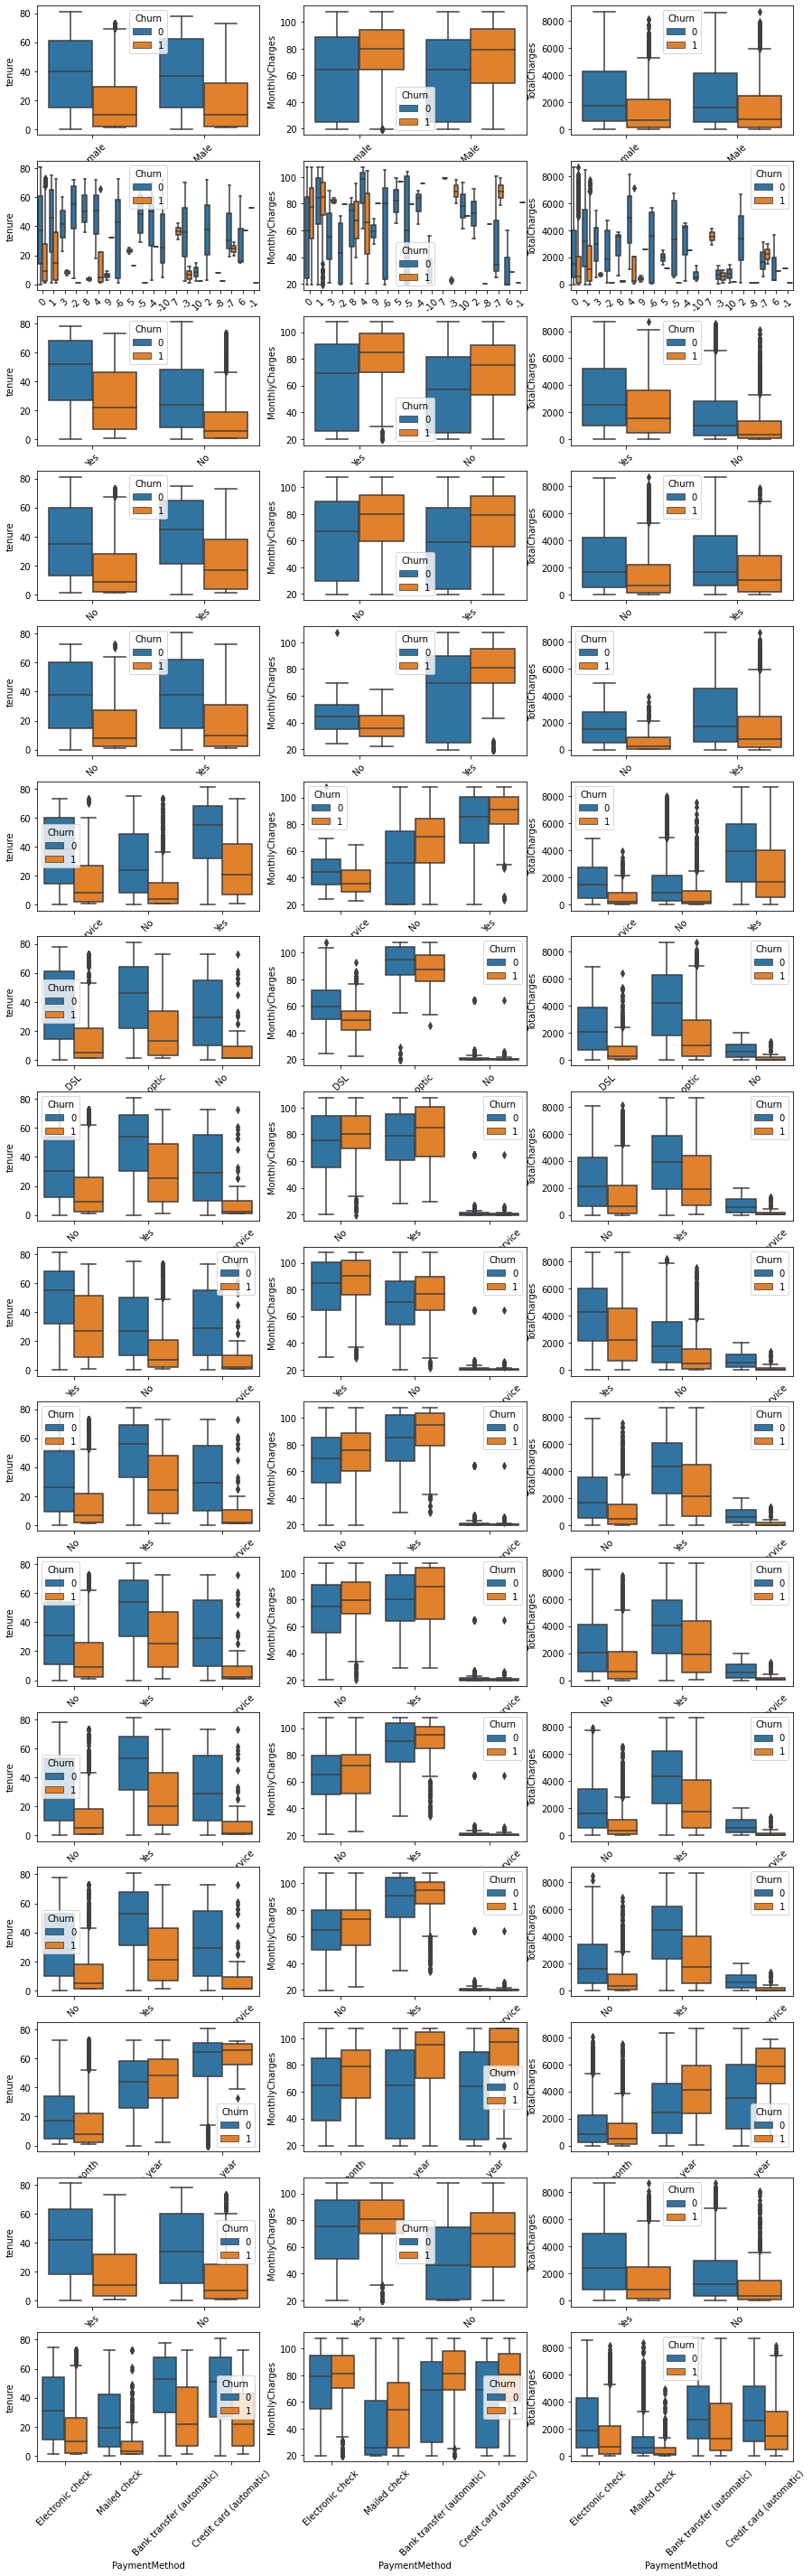

In [34]:
# 3-varibles Graphs 

# Select categorical columns from the DataFrame
cat_columns = df.select_dtypes('object').columns.drop('customerID')

# Select numerical columns from the DataFrame, excluding the 'Churn' column
num_columns = df.select_dtypes(exclude='object').columns.drop(['MonthlyChargeCategory','Churn'])

# Create subplots: one for each combination of categorical and numerical columns
# Adjust the size of the figure to accommodate all subplots
fig, axes = plt.subplots(len(cat_columns), len(num_columns), figsize=(15,50))

for c, nCol in enumerate(num_columns):
    for r, cCol in enumerate(cat_columns):
        # Select the current axis for the subplot
        axis = axes[r][c]
        
        # Create a boxplot for the current pair of columns
        # Differentiate data points using the 'Churn' column
        sns.boxplot(x=cCol, y=nCol, hue='Churn', data=df, ax=axis)
        
        # Rotate the x-axis labels for better readability
        axis.set_xticklabels(axis.get_xticklabels(), rotation=45)

# Display the generated plots
plt.show()


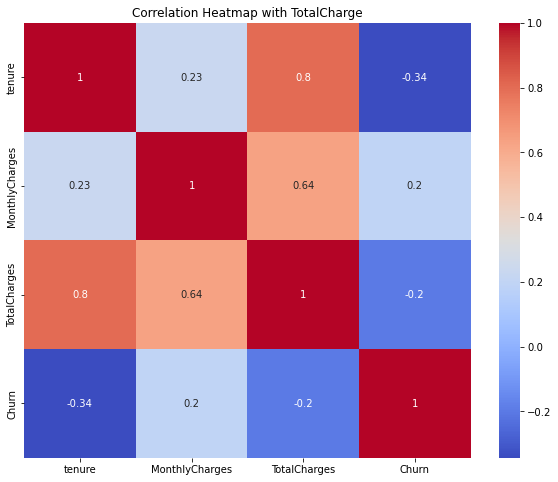

In [35]:
# Compute the correlation matrix for the DataFrame
correlation_matrix = df.corr()

# Initialize a figure for the heatmap
plt.figure(figsize=(10, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set a title for the heatmap
plt.title("Correlation Heatmap with TotalCharge")
plt.show()

# Create a contingency table
contingency_table = pd.crosstab(df['MonthlyChargeCategory'], df['Churn'])

The variance captured by pca 1 is:  99.9856%
The variance captured by pca 2 is:  0.0122%


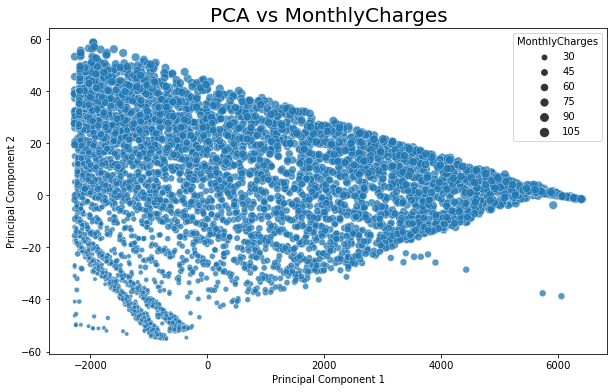

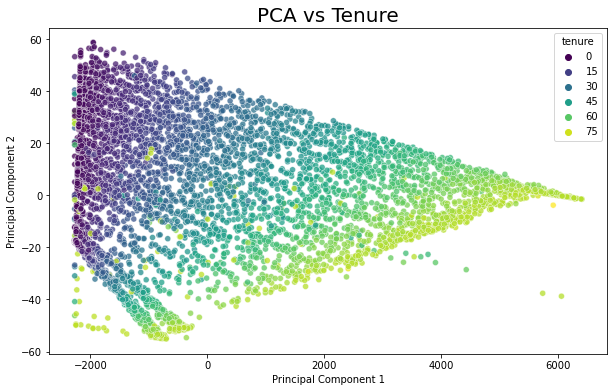

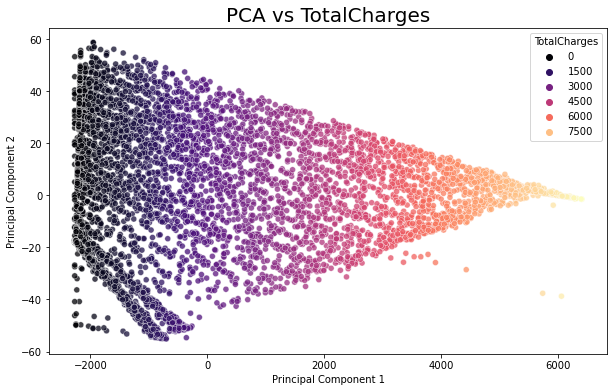

In [37]:
# Selecting only the relevant numerical columns
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
ndf = df[numerical_cols].dropna()

from sklearn.decomposition import PCA

# Performing PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(ndf)

# Adding the principal components to the dataframe
ndf['pca1'] = principalComponents[:,0]
ndf['pca2'] = principalComponents[:,1]

# Displaying the variance captured by each PCA component
for ind, var in enumerate(pca.explained_variance_ratio_):
    print(f'The variance captured by pca {ind+1} is: {var*100: 0.4f}%')

# Plotting PCA vs MonthlyCharges
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', size='MonthlyCharges', alpha=0.75, data=ndf)
plt.title('PCA vs MonthlyCharges', fontsize=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plotting PCA vs Tenure with a continuous color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='tenure', palette='viridis', alpha=0.75, data=ndf)
plt.title('PCA vs Tenure', fontsize=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Plotting PCA vs TotalCharges with a continuous color palette
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='TotalCharges', palette='magma', alpha=0.75, data=ndf)
plt.title('PCA vs TotalCharges', fontsize=20)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [38]:
## PCA vs MonthlyCharges: Customers are spread out mostly along the first principal component. This indicates that 
#MonthlyCharges could be a significant factor in the variance of your dataset. If higher monthly charges are associated 
#with churn, this could indicate that price sensitivity is a factor in customer retention.

## PCA vs Tenure: There's a clear gradient along the first principal component, suggesting that tenure is a significant feature. 
#Typically, customers with shorter tenures are more likely to churn, as they may not have developed loyalty or dependence on the service.

##PCA vs TotalCharges: Similar to tenure, there is a gradient, but it appears to be less distinct. 
#TotalCharges combine tenure and monthly fees, and high total charges with churn could indicate a segment of customers who, despite a longer relationship,